In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing required Libraries.

In [ ]:
# general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn import preprocessing
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots

from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor

from sklearn.model_selection import KFold                        # for cross validation 
from sklearn.model_selection import cross_val_score              # for evaluation of model
from sklearn.model_selection import cross_val_predict        
from sklearn.neighbors import KNeighborsRegressor                # for model building
from sklearn.svm import SVR               

import warnings
warnings.filterwarnings("ignore")

## Importing data 

In [ ]:
# importing data from data source
store = pd.read_csv('/content/drive/MyDrive/Mini_Project/DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
store.head()     # showing first 5 rows of data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Checking the structure of data

In [ ]:
store.shape

(14204, 12)

## Summarising the data

In [ ]:
store.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Check if there is any missing value exists in any feature

In [ ]:
# Replacing special charater to nan value if exists
special_char = ["!","@","#","$","^","&","*",",","-"," ?"]
store.replace(special_char, value=np.nan, inplace=True)

In [ ]:
store.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [ ]:
# There are 5681 nan values present in item_outlet_sales so need for missing value treatment
df = store.apply(lambda x: x.fillna(x.value_counts().mean()))

In [ ]:
# chekcking nan values after missing value treatment
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# checking the data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Distribution of numerical features

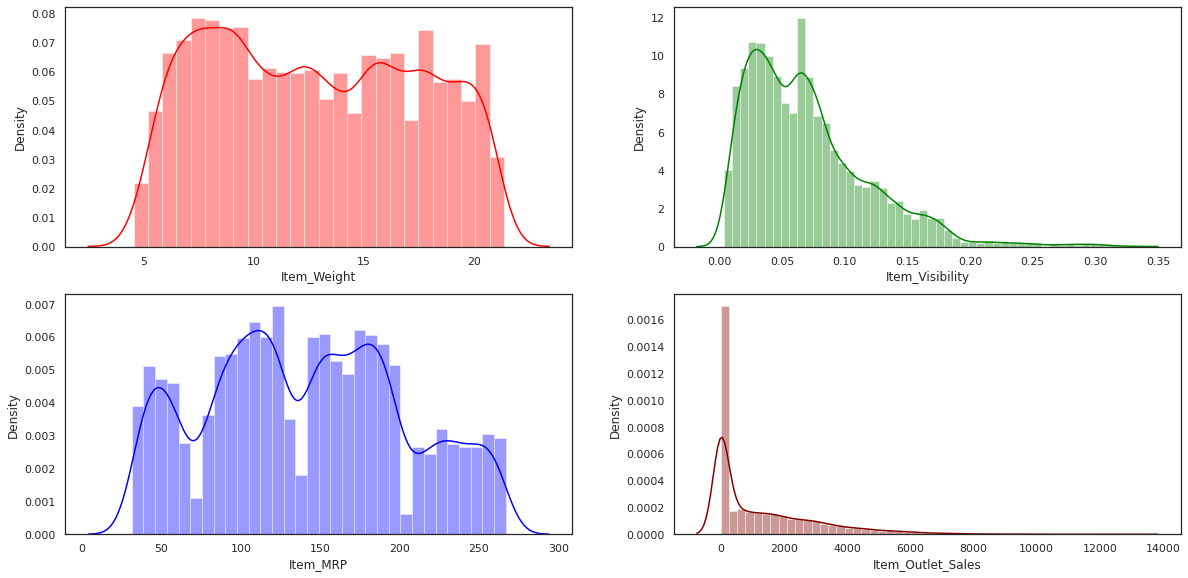

In [ ]:
plt.figure(figsize=(20,15))
# dist of item weight
plt.subplot(3,2,1)
sns.distplot(df['Item_Weight'], color='red')
# dist of item visibility
plt.subplot(3,2,2)
sns.distplot(df['Item_Visibility'], color='green')
# dist of item MRP
plt.subplot(3,2,3)
sns.distplot(df['Item_MRP'], color='blue')
# dist of item outlet sales
plt.subplot(3,2,4)
sns.distplot(df['Item_Outlet_Sales'], color='maroon')



1.   Weight of item sales is high in range between 5 to 10.
1.   In item visibility there is right squeness. Most of the items lies between 0-0.15
3.   Cost of item between 80 to 180 having high number of sales.
4.   Distribution of sales is right squed.



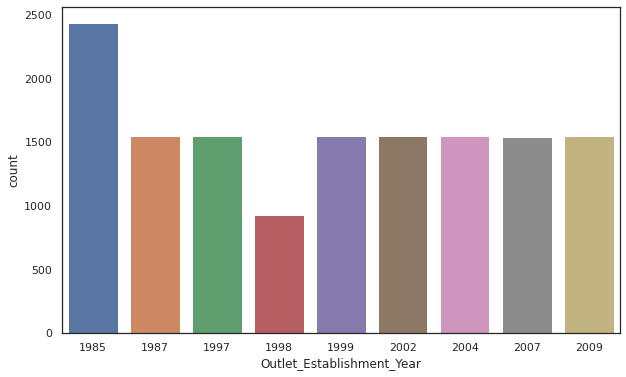

In [ ]:
# Year wise store established 
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()



1.   More number of store are established in 1985
2.   Less number of store are established in 1998



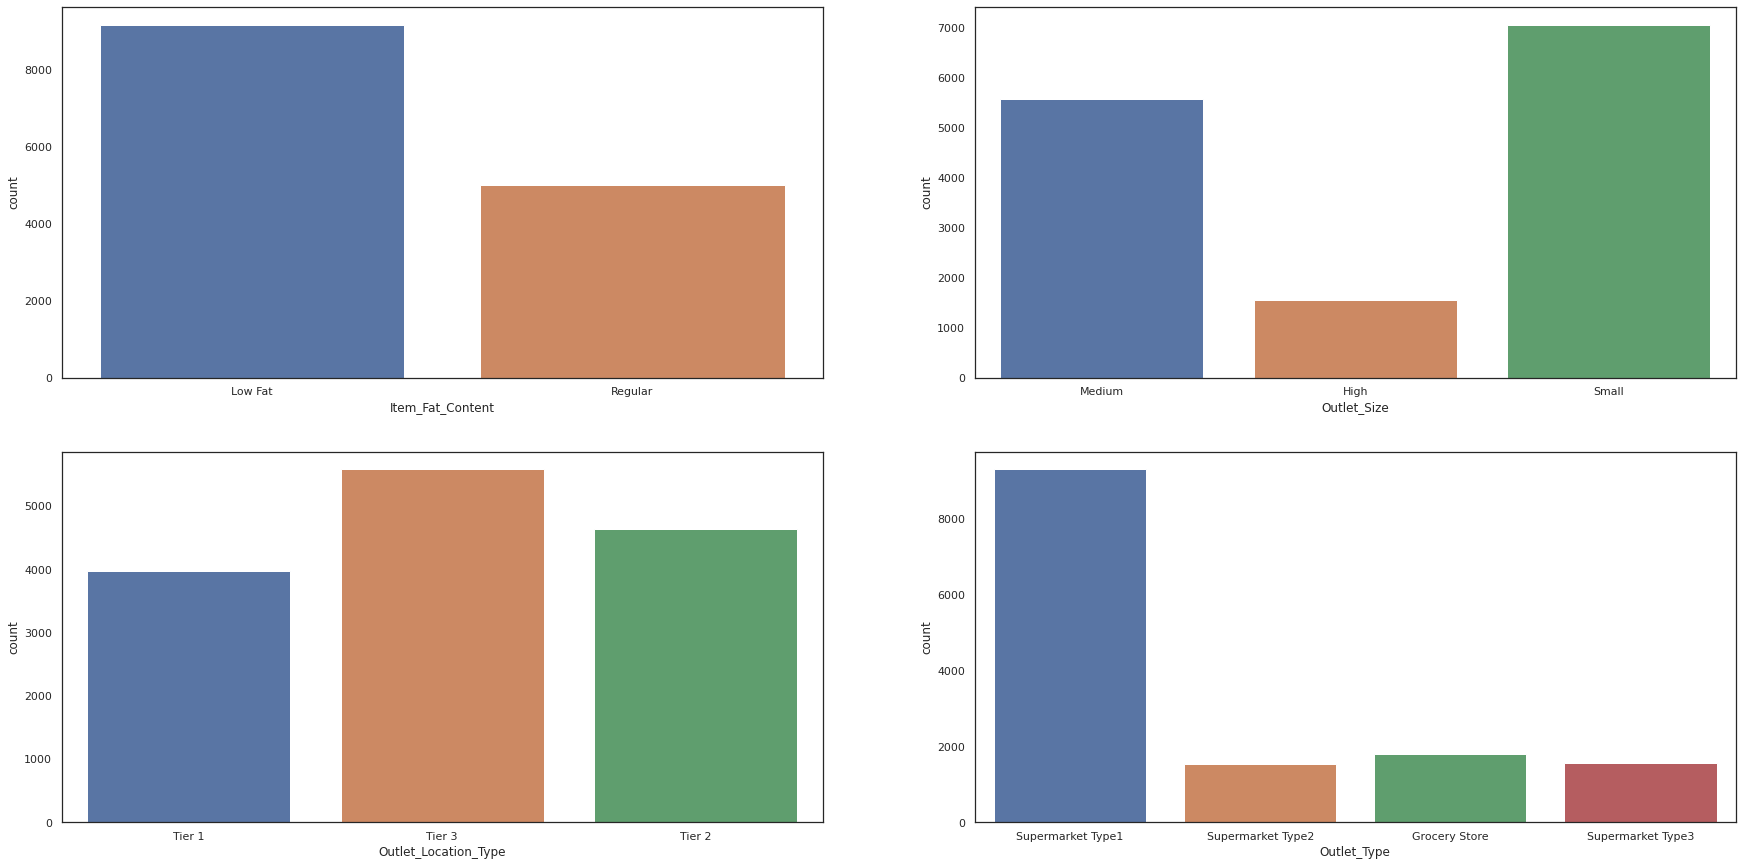

In [ ]:
plt.figure(figsize=(30,15))
# Item fat content
plt.subplot(2,2,1)
sns.countplot(x='Item_Fat_Content', data=df)
# outlet size
plt.subplot(2,2,2)
sns.countplot(x='Outlet_Size', data=df)
# outlet location type
plt.subplot(2,2,3)
sns.countplot(x='Outlet_Location_Type', data=df)
# outlet type
plt.subplot(2,2,4)
sns.countplot(x='Outlet_Type', data=df)



1.   Items having low fat are sold most
2.   Small size items are sold most
3.   Most of stores located in Tier 3
4.   Most of store are supermarket type



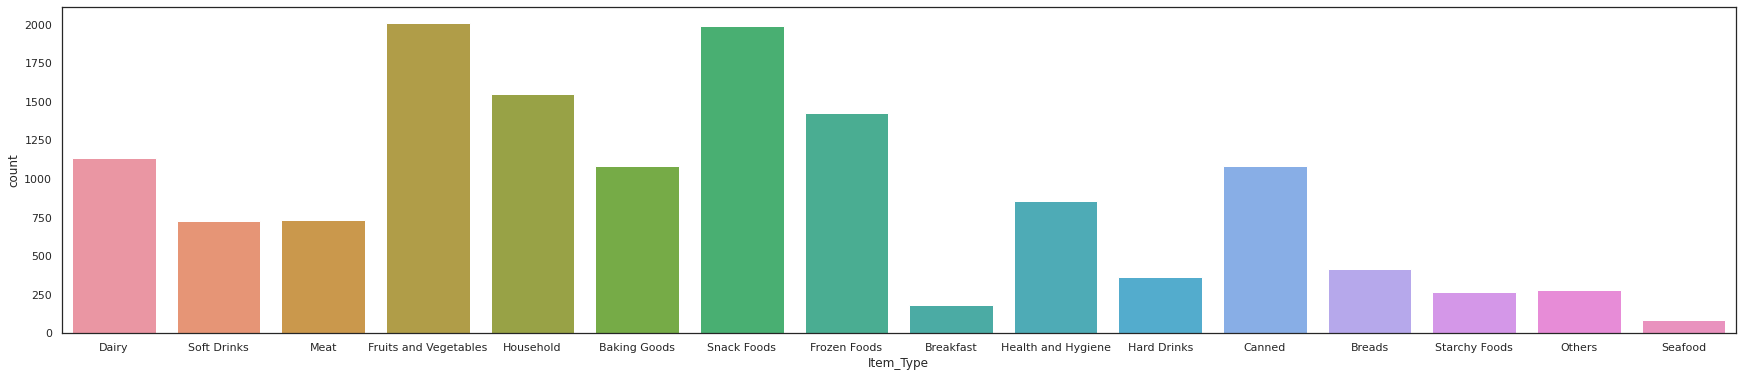

In [ ]:
# Item type
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=df)
plt.show()

---> Fruit, vegetables and snacks are sold most.

## Converting categorical column to numerical.

In [ ]:
# categorical column to numerical
encoder = LabelEncoder()

df['Item_Identifier']=encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content']=encoder.fit_transform(df['Item_Identifier'])
df['Item_Type']=encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier']=encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size']=encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=encoder.fit_transform(df['Outlet_Type'])

In [ ]:
# after converting categorical to numerical
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,156,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,8,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,662,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1121,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1297,0.064299,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
# scaling the data
# scaling the dataset
def feature_scale(scale):
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  new_data = df.select_dtypes(include=numerics)
  if scale == 'minmax':
    scaler = MinMaxScaler()
  else:
    scaler = StandardScaler()
  data_scaled = pd.DataFrame(scaler.fit_transform(new_data.to_numpy()),columns=new_data.columns)
  return data_scaled

In [ ]:
# scaling the data using MinMax Scaling process
scale = 'minmax' #standard
data_scaled = feature_scale(scale)
data_scaled.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100128,0.282525,0.100128,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.285276
1,0.005135,0.081274,0.005135,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.033703
2,0.424904,0.770765,0.424904,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.160100
3,0.719512,0.871986,0.719512,0.218055,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,0.055787
4,0.832478,0.260494,0.832478,0.186950,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,0.075835


In [ ]:
# correlation
corr = data_scaled.corr()
corr.style.background_gradient(cmap='Wistia')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.050768,1.000000,-0.040769,-0.012048,0.010743,-0.001089,-0.002954,0.002209,-0.002473,-0.004532,0.000908
Item_Weight,0.050768,1.000000,0.050768,-0.020472,0.031884,0.035751,0.003002,0.000247,0.000944,-0.001719,0.001913,0.021257
Item_Fat_Content,1.000000,0.050768,1.000000,-0.040769,-0.012048,0.010743,-0.001089,-0.002954,0.002209,-0.002473,-0.004532,0.000908
Item_Visibility,-0.040769,-0.020472,-0.040769,1.000000,-0.037821,-0.009144,-0.108731,-0.090833,0.026808,-0.020550,-0.172744,-0.078925
Item_Type,-0.012048,0.031884,-0.012048,-0.037821,1.000000,0.043948,0.001126,0.003061,-0.001080,0.002083,0.004305,0.009774
Item_MRP,0.010743,0.035751,0.010743,-0.009144,0.043948,1.000000,-0.000555,0.000141,-0.001305,0.000838,0.000136,0.342933
Outlet_Identifier,-0.001089,0.003002,-0.001089,-0.108731,0.001126,-0.000555,1.000000,0.079047,0.423623,-0.716151,0.099899,0.097776
Outlet_Establishment_Year,-0.002954,0.000247,-0.002954,-0.090833,0.003061,0.000141,0.079047,1.000000,0.428387,-0.089328,-0.122519,-0.029503
Outlet_Size,0.002209,0.000944,0.002209,0.026808,-0.001080,-0.001305,0.423623,0.428387,1.000000,-0.590677,-0.260496,-0.036477
Outlet_Location_Type,-0.002473,-0.001719,-0.002473,-0.020550,0.002083,0.000838,-0.716151,-0.089328,-0.590677,1.000000,0.467251,0.053872


In [ ]:
#SELECTING BEST FEATURE BASED ON THERE CORRELATION VALUE GREATER THAN 0.1
best_feature = []
for i in df:
  if abs(df[i].corr(data_scaled['Item_Outlet_Sales']))>=0.05:
    best_feature.append(i) 
best_feature

['Item_Visibility',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

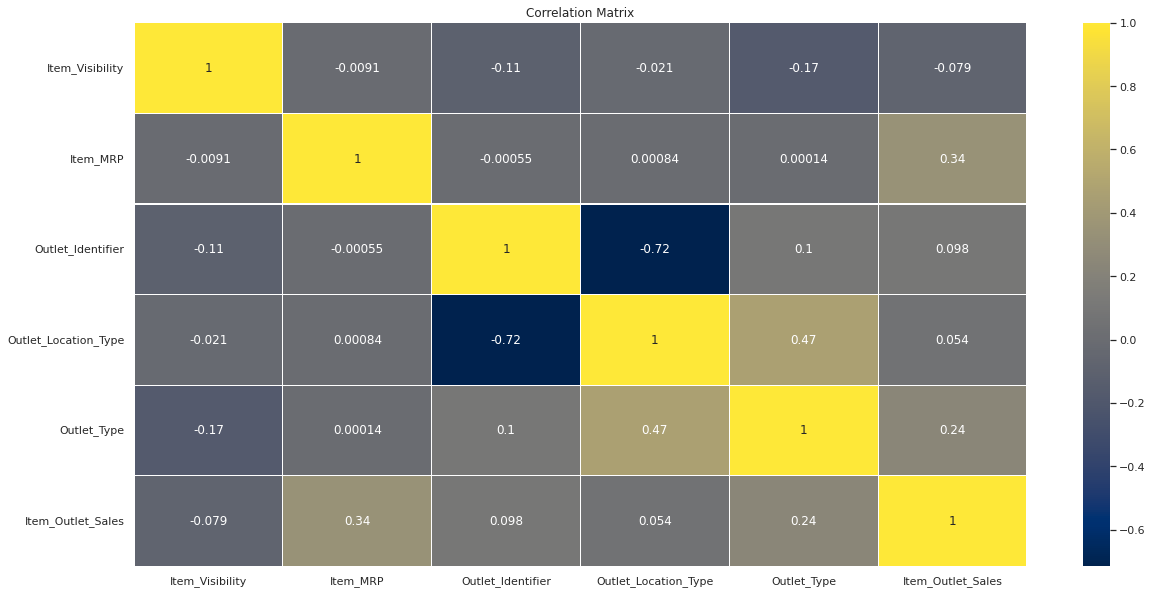

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
ax = (sns.heatmap(data_scaled[best_feature]
                  .corr(), annot =True, cmap ='cividis',linewidths=0.1, linecolor='white').set(title = 'Correlation Matrix'))
plt.show()

In [ ]:
df1 = data_scaled[['Item_Visibility', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Size']]
df1.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size
0,0.038399,0.927507,1.000000,0.0,0.333333,0.285276,0.5
1,0.048346,0.072068,0.333333,1.0,0.666667,0.033703,0.5
2,0.040593,0.468288,1.000000,0.0,0.333333,0.160100,0.5
3,0.218055,0.640093,0.000000,1.0,0.000000,0.055787,0.5
4,0.186950,0.095805,0.111111,1.0,0.333333,0.075835,0.0


## Splitting the data

In [ ]:
# Splitting the data into features and target column

X = df1.drop(columns='Item_Outlet_Sales', axis=1)
Y = df1['Item_Outlet_Sales']

In [ ]:
# Splitting the data into train and test data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(14204, 6) (11363, 6) (2841, 6)


## Training the model

In [ ]:
# creating function to build model and to evaluate it
def MODEL(model, X, Y):
    cv = KFold(n_splits=10, shuffle=False, random_state=None)
    r2 = cross_val_score(model, X, Y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    mse = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
    rmse = cross_val_score(model, X, Y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
    mae = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
 
    print('R2-Score: {} %'.format(abs(round((mean(r2)*100),2))))
    print('Mean Squared Error: {} %'.format(abs(round((mean(mse)*100),2))))
    print('Root Mean Squared Error: {} %'.format(abs(round((mean(rmse)*100),2))))
    print('Mean Absolute Error: {} %'.format(abs(round((mean(mae)*100),2))))

## Linear Regressor

In [ ]:
MODEL(LinearRegression(), X, Y)

R2-Score: 4.81 %
Mean Squared Error: 1.58 %
Root Mean Squared Error: 12.58 %
Mean Absolute Error: 9.78 %


## Decission Tree Regressor

In [ ]:
MODEL(DecisionTreeRegressor(), X, Y)

R2-Score: 38.04 %
Mean Squared Error: 2.9 %
Root Mean Squared Error: 17.0 %
Mean Absolute Error: 11.76 %


## Random Forest Regressor

In [ ]:
MODEL(RandomForestRegressor(), X, Y)

R2-Score: 2.7 %
Mean Squared Error: 1.75 %
Root Mean Squared Error: 13.2 %
Mean Absolute Error: 9.77 %


## Adaptive Boosting Regressor

In [ ]:
MODEL(AdaBoostRegressor(), X, Y)

R2-Score: 20.75 %
Mean Squared Error: 1.55 %
Root Mean Squared Error: 12.56 %
Mean Absolute Error: 9.69 %


In [ ]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

MODEL(get_stacking(), X, Y)

R2-Score: 10.07 %
Mean Squared Error: 1.78 %
Root Mean Squared Error: 13.29 %
Mean Absolute Error: 10.41 %


## From the above model Decission tree regressor is giving 


*   R2-Score: 38.04 %
*   Mean Squared Error: 2.9 %
*   Root Mean Squared Error: 17.0 %
*   Mean Absolute Error: 11.76 %
## So we can say Decission tree regressor is the best model among above

## Training the model using decission tree regressor.

In [70]:
# predicting values
cv = KFold(n_splits=10, shuffle=False, random_state=None)
Y_pred = cross_val_predict(DecisionTreeRegressor(), X_test, Y_test, cv=cv)
Y_pred

array([0.03395704, 0.        , 0.        , ..., 0.19521014, 0.23861466,
       0.        ])

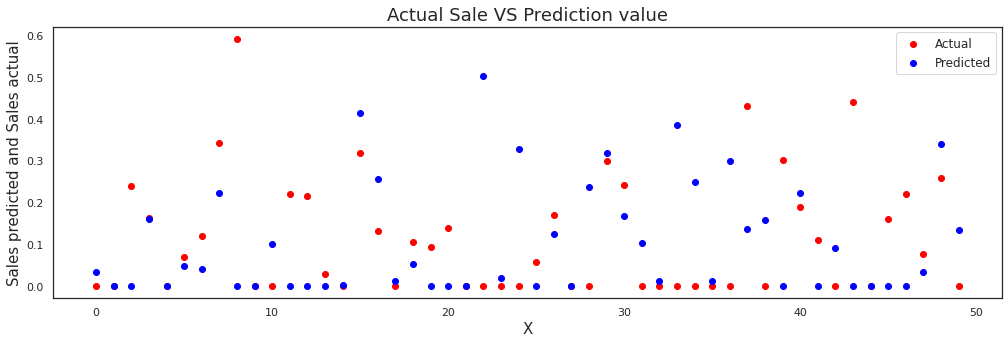

In [72]:
# plotting actual and pred values of first 50 datapoints 
x_1 = list(np.arange(0,len(Y_test.iloc[:50])))
plt.figure(figsize=(17,5))
plt.scatter(x_1,Y_test.iloc[:50],color='red')
plt.scatter(x_1,pd.Series(Y_pred).iloc[:50],color='blue')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Sales predicted and Sales actual' , fontsize = 15)
plt.legend(['Actual','Predicted'],loc="upper right",fontsize = 12)
plt.title('Actual Sale VS Prediction value' , fontsize = 18);